<a href="https://colab.research.google.com/github/femina-dev/Project_INSE6220/blob/main/Project_Classification_with_PyCaret_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [ ]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The data used in this analysis is Rice Seed Data. Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. It has 10 attributes that correspond to the classification of rice seed With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds.In this study Ipsala,Karacadag,Arborio are three different varieties of rice were used. 506 elements each, randomly selected for the experiment with label include area, perimeter, aspect ratio etc. Models were created by using Artificial Neural Network (ANN) and Deep Neural Network (DNN) algorithms for the feature dataset and classification processes were performed.

The data set can be used for the tasks of classification of rive varieties and cluster analysis and evaluate the quality of seeds.

Attribute Information:

To construct the data, Ten geometric parameters and attributes of Rice seed were measured:
1. Area A,
2. perimeter P,
3. Majoraxislength,
4. Minoraxislength,
5. Eccentricity,
6. EquivDiameter
7. ConvexArea,
8. Extend
9. Aspectratio
10. Roundness
All of these parameters were real-valued continuous.

https://www.muratkoklu.com/datasets/

https://www.muratkoklu.com/datasets/vtdhnd08.php

https://github.com/femina-dev/Project_INSE6220/blob/main/seed.csv

In [15]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/femina-dev/Project_INSE6220/main/seed.csv')
df.head(25)

Area  Perimeter  MajorAxisLength  MinorAxisLength  Eccentricity  \
0   11648    445.527         178.4659          84.9327        0.8795   
1   12769    447.830         184.4764          88.6296        0.8770   
2   14835    488.965         196.5303          97.3891        0.8686   
3    9475    408.427         178.9363          67.5776        0.9259   
4   12849    456.372         188.4676          88.1827        0.8838   
5   14883    485.363         203.2395          94.3304        0.8858   
6   13545    470.587         198.7273          88.0138        0.8966   
7   13084    460.910         190.8731          88.5734        0.8858   
8   12501    451.281         185.8183          87.0528        0.8835   
9   15917    515.441         212.7014          97.5204        0.8887   
10  14106    476.343         196.1112          92.5838        0.8815   
11  14301    480.164         187.6669          99.3781        0.8483   
12  13938    472.339         193.2652          93.5004        0.8752   
13  14829    480.976         199.1518          95.1992        0.8783   
14  14540    483.862         198.2025          95.1757        0.8772   
15  13409    460.872         186.1797          93.2367        0.8656   
16  13637    457.787         189.1338          92.4826        0.8723   
17  10760    414.906         170.6515          81.9291        0.8772   
18  12206    445.762         185.6769          84.6475        0.8900   
19  12550    453.018         187.1744          86.4708        0.8869   
20  12488    458.579         191.0610          84.4833        0.8969   
21  12843    466.299         197.1622          83.9702        0.9048   
22  15532    506.083         207.2012          97.0122        0.8836   
23  14446    488.048         203.3706          91.7769        0.8924   
24  11223    442.892         190.5174          75.9964        0.9170   

    EquivDiameter  ConvexArea  Extent  AspectRation  Roundness  class  
0        121.7813       12135  0.5660        2.1013     0.7374      1  
1        127.5068       13024  0.6733        2.0814     0.8001      1  
2        137.4355       15263  0.6910        2.0180     0.7797      1  
3        109.8360        9652  0.5299        2.6479     0.7138      1  
4        127.9056       13187  0.7814        2.1372     0.7752      1  
5        137.6576       15093  0.6267        2.1545     0.7939      1  
6        131.3241       13788  0.5821        2.2579     0.7686      1  
7        129.0700       13347  0.5865        2.1550     0.7740      1  
8        126.1617       12844  0.6212        2.1345     0.7714      1  
9        142.3592       16400  0.6048        2.1811     0.7529      1  
10       134.0161       14485  0.5871        2.1182     0.7812      1  
11       134.9392       14951  0.6070        1.8884     0.7795      1  
12       133.2157       14269  0.5999        2.0670     0.7851      1  
13       137.4077       15083  0.7572        2.0919     0.8055      1  
14       136.0621       15005  0.7734        2.0825     0.7804      1  
15       130.6632       13667  0.7145        1.9968     0.7933      1  
16       131.7694       13834  0.8014        2.0451     0.8177      1  
17       117.0472       11037  0.7535        2.0829     0.7855      1  
18       124.6642       12500  0.7538        2.1935     0.7719      1  
19       126.4087       12793  0.6137        2.1646     0.7685      1  
20       126.0961       12813  0.5513        2.2615     0.7462      1  
21       127.8758       13166  0.6398        2.3480     0.7422      1  
22       140.6270       16026  0.5726        2.1358     0.7621      1  
23       135.6216       14800  0.6465        2.2159     0.7621      1  
24       119.5390       11463  0.7753        2.5069     0.7190      1

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             506 non-null    int64  
 1   Perimeter        506 non-null    float64
 2   MajorAxisLength  506 non-null    float64
 3   MinorAxisLength  506 non-null    float64
 4   Eccentricity     506 non-null    float64
 5   EquivDiameter    506 non-null    float64
 6   ConvexArea       506 non-null    int64  
 7   Extent           506 non-null    float64
 8   AspectRation     506 non-null    float64
 9   Roundness        506 non-null    float64
 10  class            506 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 43.6 KB


In [17]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [18]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

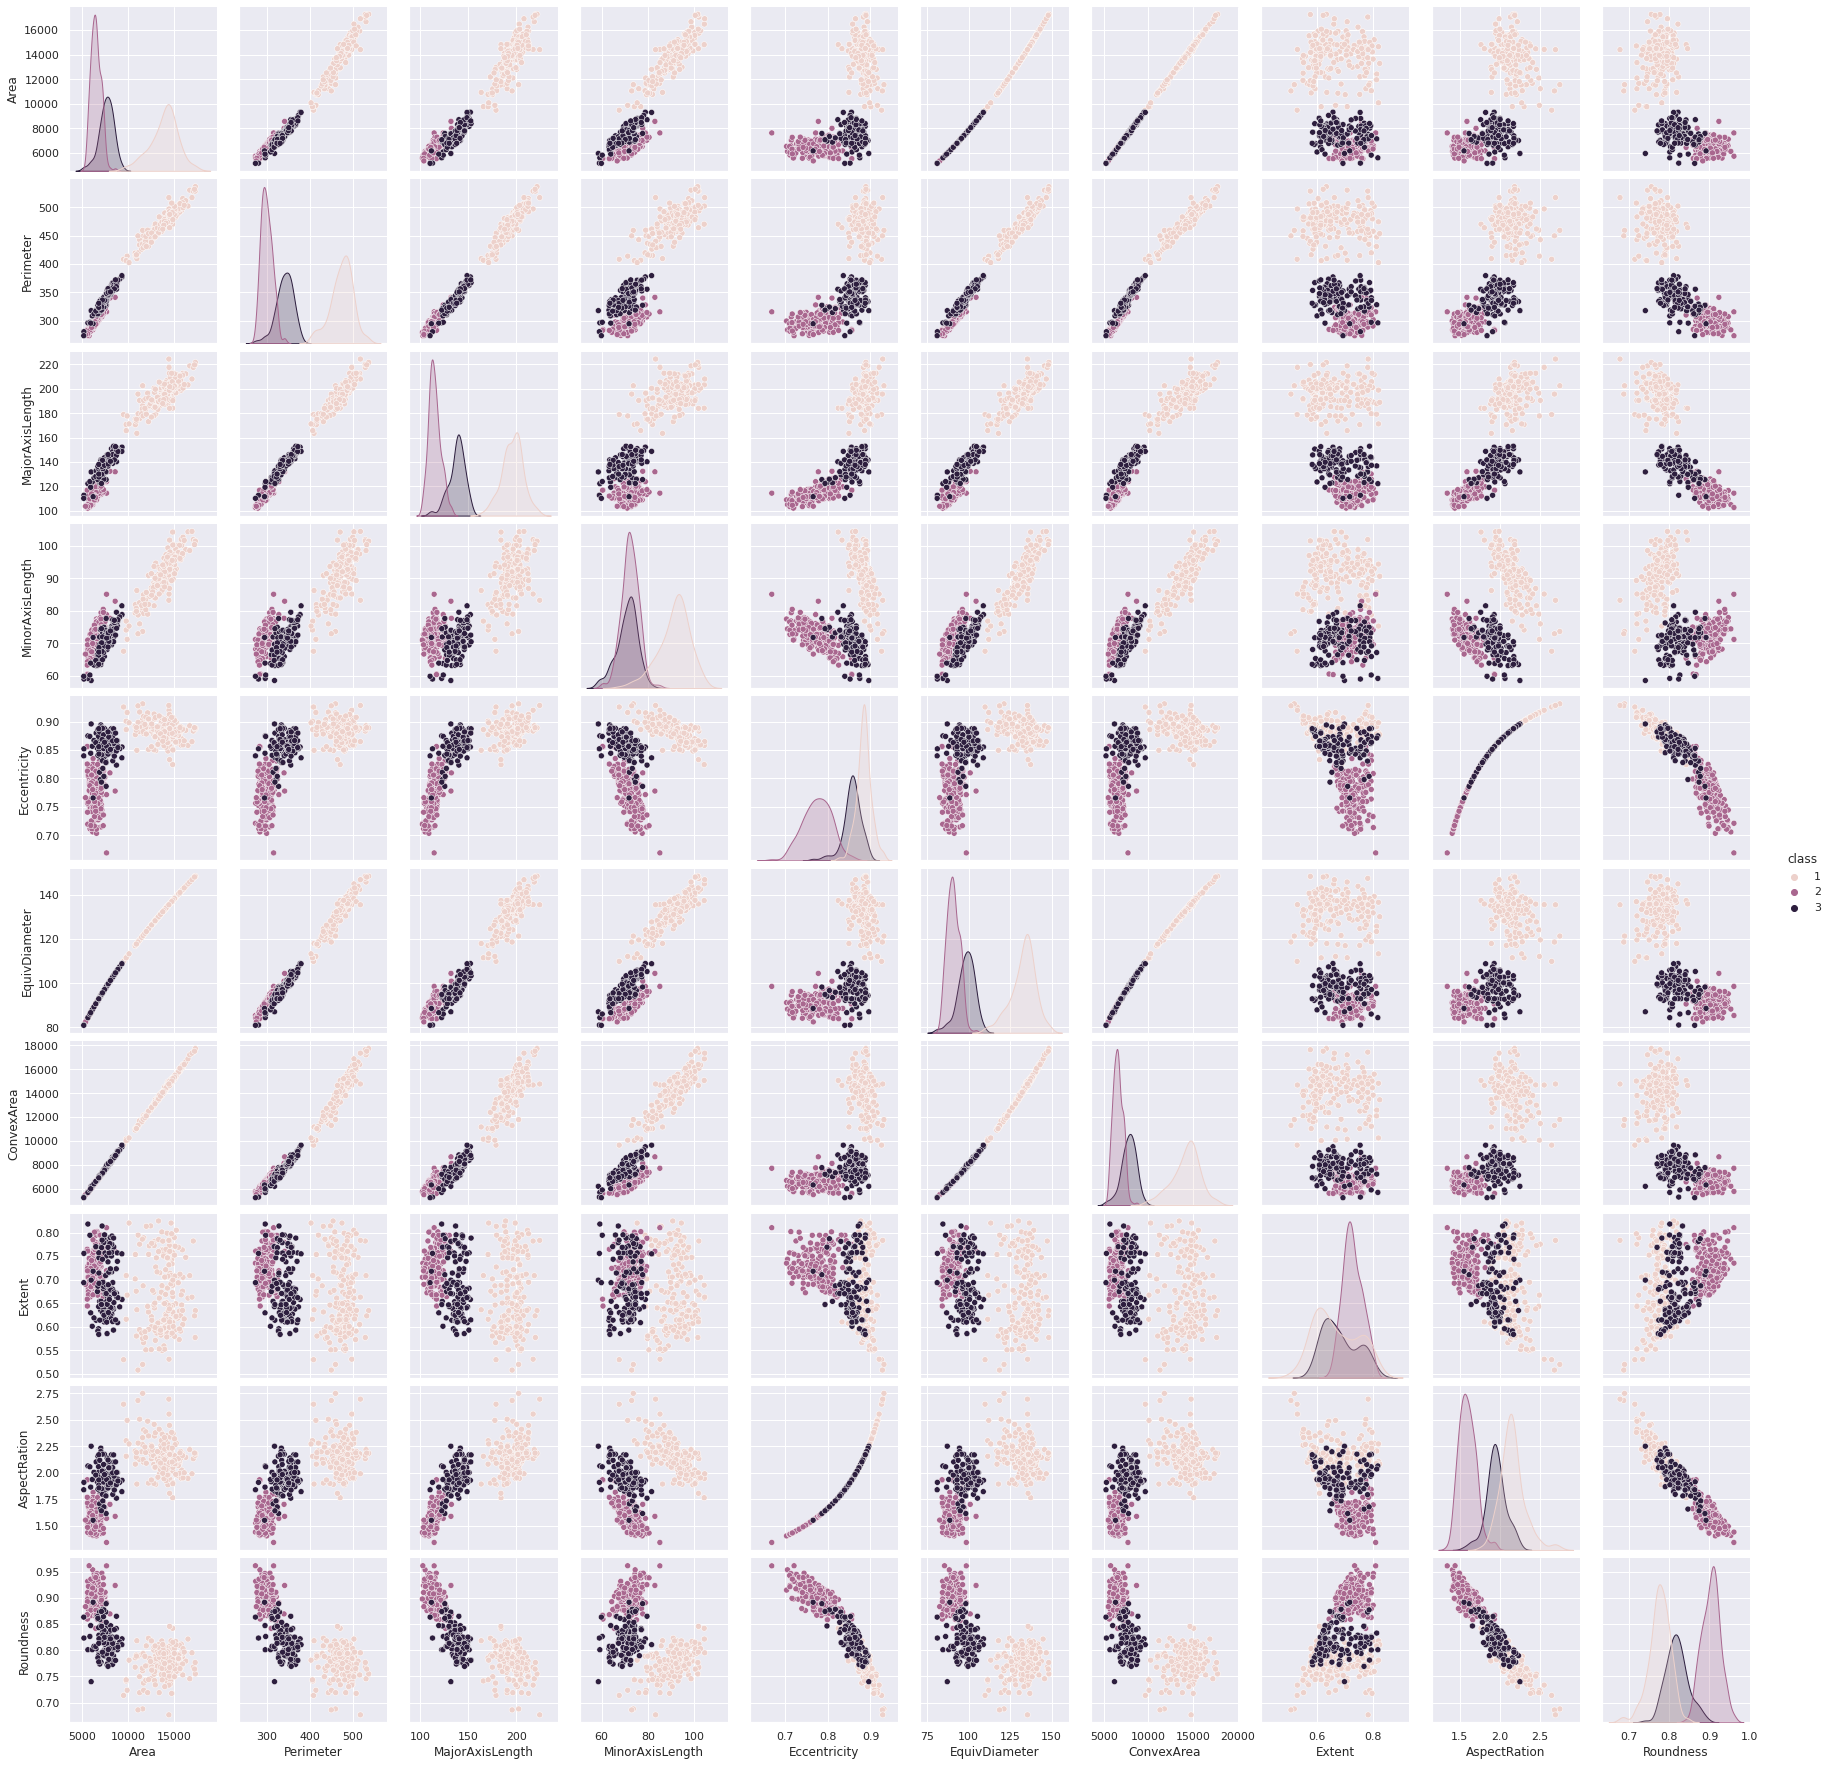

In [19]:
sns.pairplot(df, hue='class')
plt.show()

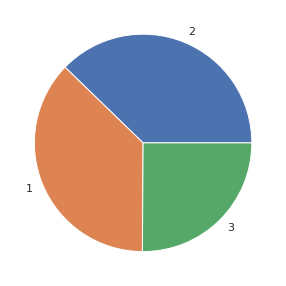

In [20]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [21]:
X = df.drop(columns=['class'])
X.head(10)

Area  Perimeter  MajorAxisLength  MinorAxisLength  Eccentricity  \
0  11648    445.527         178.4659          84.9327        0.8795   
1  12769    447.830         184.4764          88.6296        0.8770   
2  14835    488.965         196.5303          97.3891        0.8686   
3   9475    408.427         178.9363          67.5776        0.9259   
4  12849    456.372         188.4676          88.1827        0.8838   
5  14883    485.363         203.2395          94.3304        0.8858   
6  13545    470.587         198.7273          88.0138        0.8966   
7  13084    460.910         190.8731          88.5734        0.8858   
8  12501    451.281         185.8183          87.0528        0.8835   
9  15917    515.441         212.7014          97.5204        0.8887   

   EquivDiameter  ConvexArea  Extent  AspectRation  Roundness  
0       121.7813       12135  0.5660        2.1013     0.7374  
1       127.5068       13024  0.6733        2.0814     0.8001  
2       137.4355       15263  0.6910        2.0180     0.7797  
3       109.8360        9652  0.5299        2.6479     0.7138  
4       127.9056       13187  0.7814        2.1372     0.7752  
5       137.6576       15093  0.6267        2.1545     0.7939  
6       131.3241       13788  0.5821        2.2579     0.7686  
7       129.0700       13347  0.5865        2.1550     0.7740  
8       126.1617       12844  0.6212        2.1345     0.7714  
9       142.3592       16400  0.6048        2.1811     0.7529

In [22]:
X.describe().transpose()

count         mean          std        min          25%  \
Area             506.0  9487.895257  3554.704699  5146.0000  6529.750000   
Perimeter        506.0   374.466891    80.376250   273.6300   302.951500   
MajorAxisLength  506.0   150.675767    36.918690   102.2313   116.284275   
MinorAxisLength  506.0    78.901814    10.816671    58.5632    71.057325   
Eccentricity     506.0     0.835774     0.054863     0.6688     0.790050   
EquivDiameter    506.0   108.088237    19.952034    80.9450    91.180825   
ConvexArea       506.0  9696.389328  3643.710367  5254.0000  6664.000000   
Extent           506.0     0.694532     0.065862     0.5078     0.640975   
AspectRation     506.0     1.891967     0.278332     1.3452     1.631225   
Roundness        506.0     0.834320     0.061677     0.6768     0.782850   

                        50%           75%         max  
Area             7667.00000  13452.500000  17285.0000  
Perimeter         341.99250    463.930750    536.4050  
MajorAxisLength   138.80810    190.913525    224.4403  
MinorAxisLength    74.63920     89.426050    104.4405  
Eccentricity        0.85555      0.880450      0.9315  
EquivDiameter      98.80245    130.874925    148.3508  
ConvexArea       7867.00000  13760.250000  17732.0000  
Extent              0.70370      0.749600      0.8246  
AspectRation        1.93160      2.108900      2.7500  
Roundness           0.82075      0.893175      0.9610

**Standardize the Data**

In [23]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Area  Perimeter  MajorAxisLength  MinorAxisLength  Eccentricity  \
0  0.608276   0.884968         0.753484         0.558107      0.797798   
1  0.923945   0.913649         0.916449         0.900223      0.752185   
2  1.505722   1.425936         1.243270         1.710839      0.598924   
3 -0.003631   0.422932         0.766238        -1.047958      1.644383   
4  0.946473   1.020030         1.024663         0.858866      0.876253   
5  1.519238   1.381078         1.425179         1.427783      0.912744   
6  1.142463   1.197060         1.302838         0.843236      1.109794   
7  1.012648   1.076545         1.089885         0.895022      0.912744   
8  0.848477   0.956627         0.952832         0.754304      0.870780   
9  1.810408   1.755663         1.681723         1.722990      0.965655   

   EquivDiameter  ConvexArea    Extent  AspectRation  Roundness  
0       0.686978    0.669928 -1.953474      0.752845  -1.572979  
1       0.974225    0.914152 -0.322694      0.681277  -0.555381  
2       1.472346    1.529243 -0.053684      0.453266  -0.886466  
3       0.087685   -0.012195 -2.502134      2.718633  -1.955999  
4       0.994233    0.958931  1.320245      0.881955  -0.959499  
5       1.483489    1.482541 -1.030936      0.944173  -0.656005  
6       1.165739    1.124035 -1.708781      1.316040  -1.066615  
7       1.052651    1.002885 -1.641909      0.945971  -0.978975  
8       0.906742    0.864703 -1.114527      0.872245  -1.021172  
9       1.719367    1.841597 -1.363779      1.039837  -1.321420

In [24]:
X.describe().transpose()

count          mean      std       min       25%       50%  \
Area             506.0  0.000000e+00  1.00099 -1.222659 -0.833001 -0.512756   
Perimeter        506.0 -5.616939e-17  1.00099 -1.255802 -0.890638 -0.404430   
MajorAxisLength  506.0  1.123388e-16  1.00099 -1.313492 -0.932469 -0.321772   
MinorAxisLength  506.0 -5.055245e-16  1.00099 -1.882163 -0.725940 -0.394468   
Eccentricity     506.0 -1.937844e-15  1.00099 -3.046499 -0.834249  0.360822   
EquivDiameter    506.0 -1.123388e-16  1.00099 -1.361771 -0.848242 -0.465866   
ConvexArea       506.0 -2.808469e-16  1.00099 -1.220400 -0.833049 -0.502565   
Extent           506.0  1.404235e-16  1.00099 -2.838017 -0.813980  0.139335   
AspectRation     506.0  8.425408e-16  1.00099 -1.966387 -0.937729  0.142537   
Roundness        506.0 -5.336092e-16  1.00099 -2.556496 -0.835342 -0.220239   

                      75%       max  
Area             1.116416  2.195631  
Perimeter        1.114165  2.016745  
MajorAxisLength  1.090981  2.000004  
MinorAxisLength  0.973927  2.363385  
Eccentricity     0.815131  1.746557  
EquivDiameter    1.143204  2.019965  
ConvexArea       1.116412  2.207520  
Extent           0.836938  1.976813  
AspectRation     0.780178  3.085825  
Roundness        0.955193  2.055968

**Observations and variables**

In [25]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

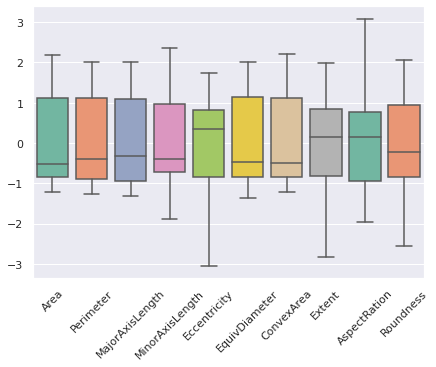

In [26]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

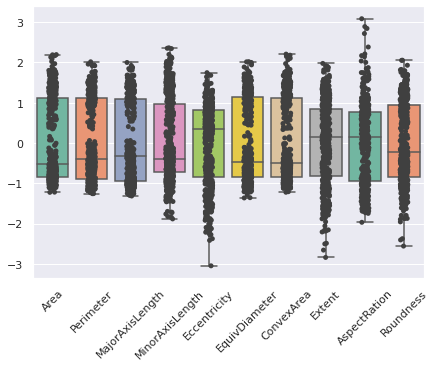

In [27]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

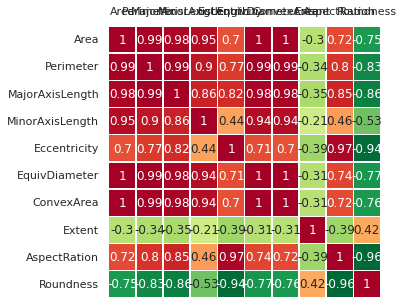

In [28]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

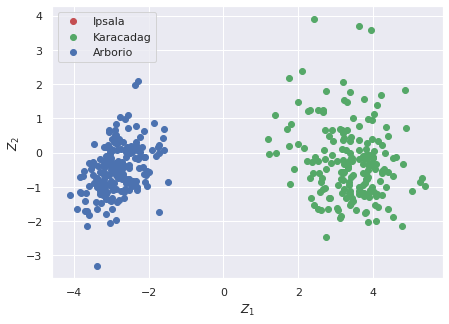

In [29]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Ipsala)->0,  2(Karacadag)->1, 3(Arborio)->2
idx_Ipsala = np.where(y == 0)
idx_Karacadag = np.where(y == 1)
idx_Arborio = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Ipsala,0], Z[idx_Ipsala,1], c='r', label='Ipsala')
plt.scatter(Z[idx_Karacadag,0], Z[idx_Karacadag,1], c='g', label='Karacadag')
plt.scatter(Z[idx_Arborio,0], Z[idx_Arborio,1], c='b', label='Arborio')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

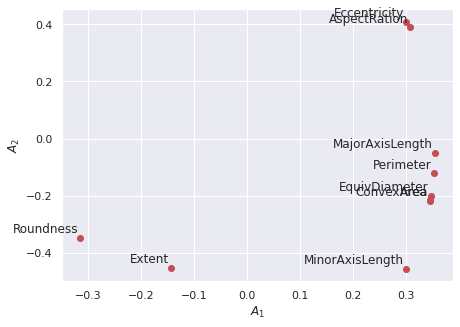

In [30]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


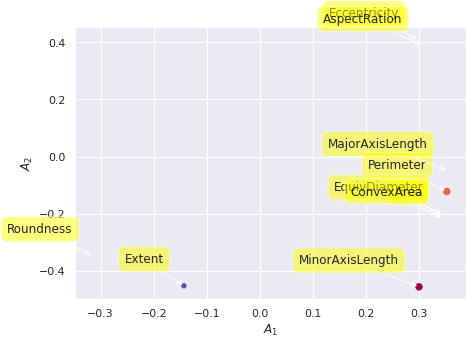

In [31]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

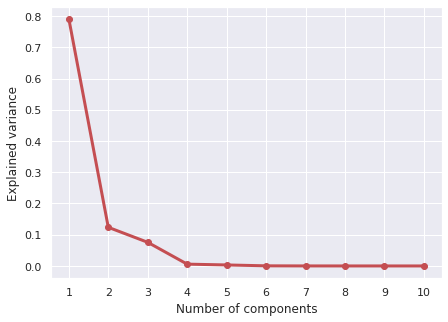

In [32]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

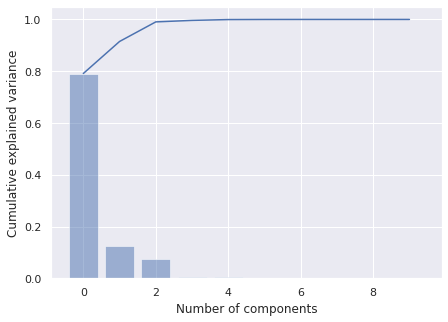

In [33]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

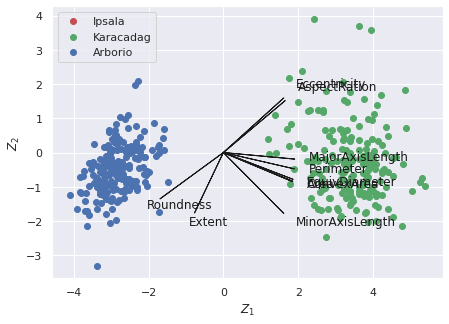

In [34]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Ipsala,0], Z[idx_Ipsala,1], c='r', label='Ipsala')
plt.scatter(Z[idx_Karacadag,0], Z[idx_Karacadag,1], c='g', label='Karacadag')
plt.scatter(Z[idx_Arborio,0], Z[idx_Arborio,1], c='b', label='Arborio')
plt.legend(loc='upper left')

##**Using PCA Library**

In [35]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=5e86ee4a0f2379b23ec19d01d11da8a50b41919ea426331652eb32d6c25ac1a6
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=dbab4472d62d6935058cfd914fb77698116aa5d7358fc312706971979dc0200f
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=b4a42223d4e78a618f9b485de8052af29d30e589f8202a0ace70dc668fd03a4a
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built adjustText sklearn wget


In [36]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [37]:
out['PC']

PC1       PC2       PC3
0    2.668693  1.232398 -1.182958
1    2.542091 -0.249357 -0.073936
2    3.615738 -1.213582 -0.106952
3    2.431913  3.908933 -0.433532
4    2.626418 -0.740735  1.542344
..        ...       ...       ...
501 -0.594100  0.884222  0.240800
502 -1.396575  0.972696  1.340565
503 -0.629443  0.514353  0.645202
504  0.524242  1.889406 -0.335545
505 -0.405284  3.069580 -0.409183

[506 rows x 3 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [506] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [506] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5c2572f290>)

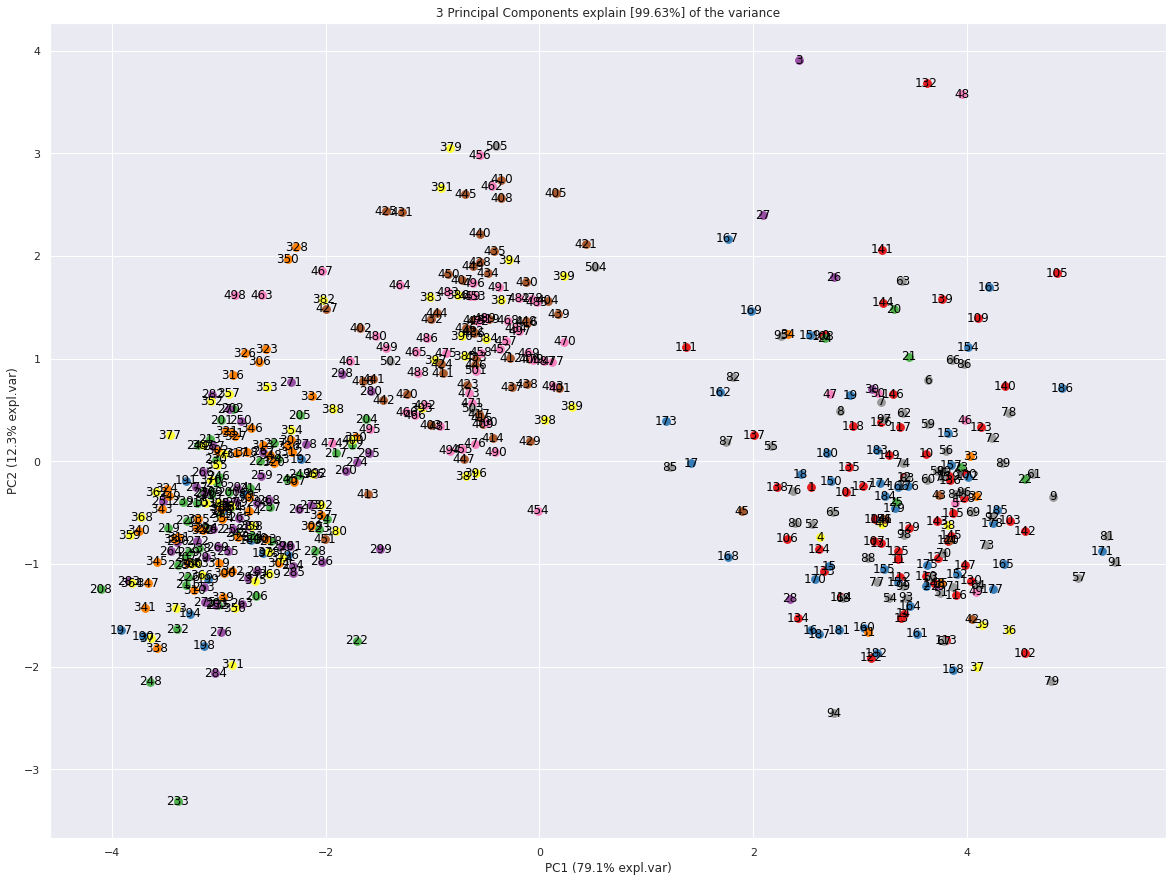

In [38]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [39]:
A = out['loadings'].T

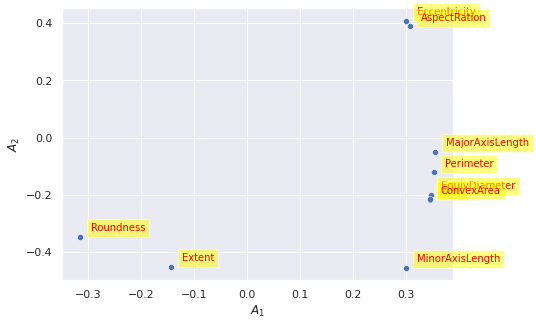

In [40]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

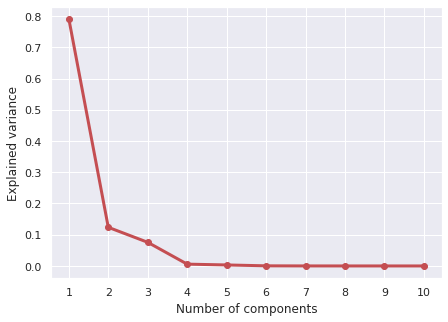

In [41]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

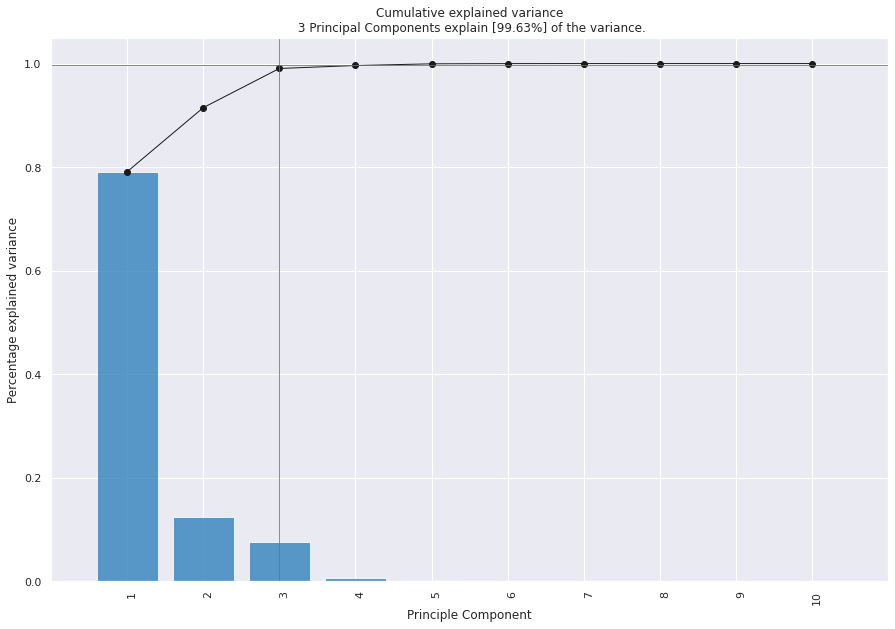

<Figure size 504x360 with 0 Axes>

In [42]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [506] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [506] unique colors! Available unique colors: [9].


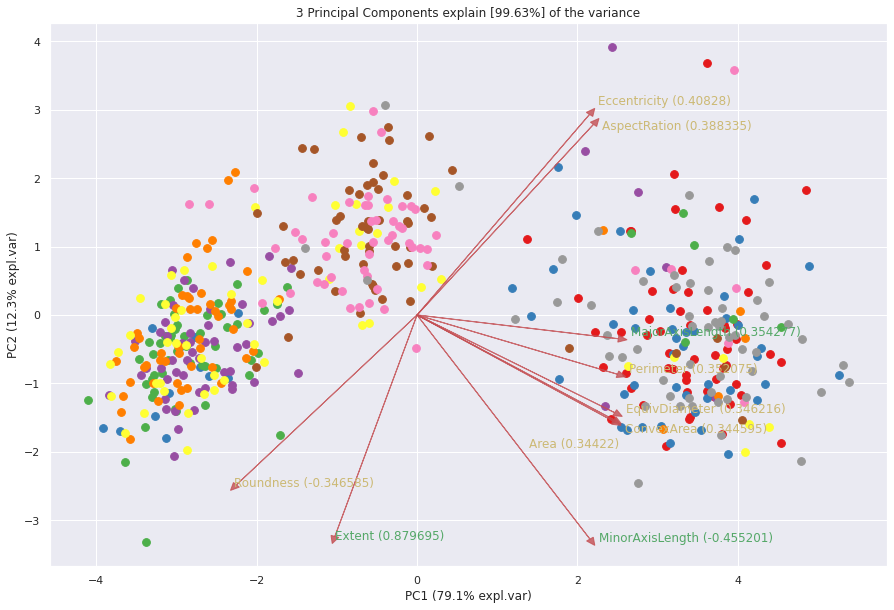

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5c257d4190>)

In [43]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [506] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [506] unique colors! Available unique colors: [9].


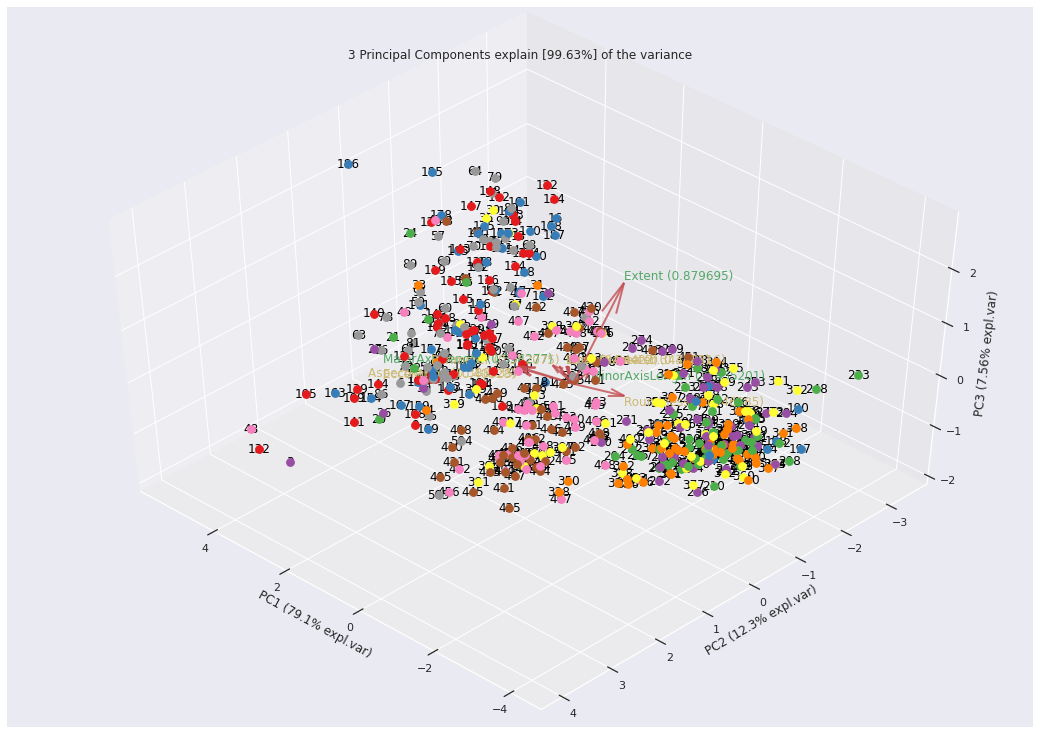

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f5c28233d10>)

In [44]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [45]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [46]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (455, 11)
Unseen Data For Predictions: (51, 11)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [47]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data         (455, 11)
5                           Missing Values             False
6                         Numeric Features                10
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (318, 6)
12                    Transformed Test Set          (137, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              707f
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [48]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.9684  0.9948  0.9607  0.9725   
lr                    Logistic Regression    0.9652  0.9972  0.9591  0.9709   
qda       Quadratic Discriminant Analysis    0.9621  0.9961  0.9563  0.9680   
lda          Linear Discriminant Analysis    0.9620  0.9965  0.9574  0.9650   
et                 Extra Trees Classifier    0.9619  0.9963  0.9523  0.9686   
dt               Decision Tree Classifier    0.9591  0.9704  0.9538  0.9665   
lightgbm  Light Gradient Boosting Machine    0.9557  0.9937  0.9478  0.9604   
nb                            Naive Bayes    0.9525  0.9943  0.9484  0.9596   
rf               Random Forest Classifier    0.9525  0.9942  0.9426  0.9580   
ada                  Ada Boost Classifier    0.9465  0.9885  0.9393  0.9588   
ridge                    Ridge Classifier    0.9274  0.0000  0.9100  0.9326   
knn                K Neighbors Classifier    0.9088  0.9670  0.8903  0.9127   
dummy                    Dummy Classifier    0.3839  0.5000  0.3333  0.1477   
svm                   SVM - Linear Kernel    0.3585  0.0000  0.3333  0.1299   

              F1   Kappa     MCC  TT (Sec)  
gbc       0.9677  0.9516  0.9538     0.254  
lr        0.9645  0.9466  0.9496     0.375  
qda       0.9614  0.9419  0.9450     0.016  
lda       0.9616  0.9417  0.9435     0.016  
et        0.9603  0.9412  0.9450     0.404  
dt        0.9583  0.9376  0.9414     0.024  
lightgbm  0.9544  0.9320  0.9354     0.145  
nb        0.9523  0.9275  0.9311     0.022  
rf        0.9510  0.9269  0.9301     0.503  
ada       0.9443  0.9186  0.9253     0.084  
ridge     0.9259  0.8882  0.8921     0.020  
knn       0.9056  0.8596  0.8640     0.117  
dummy     0.2132  0.0000  0.0000     0.013  
svm       0.1904  0.0000  0.0000     0.070

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [49]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [50]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9688  0.9750  0.9583  0.9712  0.9683  0.9521  0.9536
3       0.9688  0.9792  0.9722  0.9722  0.9690  0.9527  0.9541
4       0.9688  0.9750  0.9583  0.9712  0.9683  0.9521  0.9536
5       0.9688  0.9792  0.9722  0.9722  0.9690  0.9527  0.9541
6       0.8750  0.9167  0.8889  0.9167  0.8750  0.8140  0.8333
7       0.9375  0.9542  0.9306  0.9375  0.9375  0.9048  0.9048
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9032  0.9250  0.8571  0.9240  0.8958  0.8475  0.8608
Mean    0.9591  0.9704  0.9538  0.9665  0.9583  0.9376  0.9414
SD      0.0401  0.0283  0.0461  0.0293  0.0411  0.0609  0.0552

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [51]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [52]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9688  0.9828  0.9583  0.9712  0.9683  0.9521  0.9536
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9688  0.9828  0.9583  0.9712  0.9683  0.9521  0.9536
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9688  0.9885  0.9722  0.9722  0.9690  0.9527  0.9541
6       0.9062  0.9411  0.9028  0.9104  0.9070  0.8580  0.8593
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9355  0.9675  0.9048  0.9454  0.9328  0.8990  0.9051
9       0.8710  0.9349  0.8095  0.9054  0.8551  0.7954  0.8182
Mean    0.9619  0.9798  0.9506  0.9676  0.9601  0.9409  0.9444
SD      0.0424  0.0232  0.0589  0.0345  0.0460  0.0665  0.0611

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.2, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [53]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.2, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [54]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [55]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.2, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [56]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9688  0.9971  0.9583  0.9712  0.9683  0.9521  0.9536
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9375  0.9693  0.9306  0.9375  0.9375  0.9048  0.9048
3       0.8125  0.9365  0.8056  0.8318  0.8188  0.7176  0.7208
4       0.9375  0.9900  0.9306  0.9375  0.9375  0.9048  0.9048
5       0.8750  0.9384  0.8611  0.8750  0.8750  0.8095  0.8095
6       0.8125  0.9487  0.7639  0.8087  0.7906  0.7073  0.7224
7       0.9375  0.9678  0.9167  0.9464  0.9354  0.9036  0.9092
8       0.9677  0.9942  0.9524  0.9704  0.9672  0.9498  0.9514
9       0.8387  0.9276  0.7839  0.8489  0.8260  0.7467  0.7635
Mean    0.9088  0.9670  0.8903  0.9127  0.9056  0.8596  0.8640
SD      0.0652  0.0263  0.0773  0.0629  0.0690  0.1005  0.0965

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [57]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9062  0.9857  0.8750  0.9250  0.9006  0.8545  0.8668
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9688  0.9621  0.9583  0.9712  0.9683  0.9521  0.9536
3       0.8750  0.9659  0.8611  0.8798  0.8762  0.8095  0.8107
4       0.9688  0.9785  0.9583  0.9712  0.9683  0.9521  0.9536
5       0.8750  0.9577  0.8472  0.8780  0.8709  0.8072  0.8123
6       0.8438  0.9449  0.7917  0.8897  0.8217  0.7546  0.7867
7       0.9375  0.9707  0.9167  0.9464  0.9354  0.9036  0.9092
8       0.9355  0.9944  0.9048  0.9454  0.9328  0.8990  0.9051
9       0.8065  0.9379  0.7363  0.8138  0.7820  0.6941  0.7202
Mean    0.9117  0.9698  0.8849  0.9220  0.9056  0.8627  0.8718
SD      0.0583  0.0192  0.0764  0.0534  0.0654  0.0916  0.0836

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [58]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [59]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9688  0.9987  0.9583  0.9712  0.9683  0.9521  0.9536
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9688  1.0000  0.9583  0.9712  0.9683  0.9521  0.9536
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9375  0.9971  0.9444  0.9500  0.9381  0.9059  0.9113
6       0.9375  1.0000  0.9444  0.9500  0.9381  0.9059  0.9113
7       0.9688  0.9943  0.9583  0.9712  0.9683  0.9521  0.9536
8       0.9677  0.9941  0.9697  0.9718  0.9680  0.9505  0.9520
9       0.9032  0.9882  0.8571  0.9240  0.8958  0.8475  0.8608
Mean    0.9652  0.9972  0.9591  0.9709  0.9645  0.9466  0.9496
SD      0.0301  0.0038  0.0399  0.0237  0.0315  0.0467  0.0430

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [60]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9688  1.0000  0.9583  0.9712  0.9683  0.9521  0.9536
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9688  1.0000  0.9583  0.9712  0.9683  0.9521  0.9536
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9375  0.9914  0.9444  0.9500  0.9381  0.9059  0.9113
6       0.9375  0.9971  0.9444  0.9500  0.9381  0.9059  0.9113
7       0.9688  0.9943  0.9583  0.9712  0.9683  0.9521  0.9536
8       0.9677  0.9941  0.9697  0.9718  0.9680  0.9505  0.9520
9       0.9355  0.9825  0.9048  0.9454  0.9328  0.8990  0.9051
Mean    0.9684  0.9959  0.9638  0.9731  0.9682  0.9518  0.9540
SD      0.0245  0.0054  0.0288  0.0200  0.0247  0.0374  0.0352

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=0.472, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [61]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.472, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [62]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9688  1.0000  0.9583  0.9712  0.9683  0.9521  0.9536
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9688  0.9971  0.9583  0.9712  0.9683  0.9521  0.9536
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9688  1.0000  0.9722  0.9722  0.9690  0.9527  0.9541
6       0.8750  0.9609  0.8750  0.8875  0.8763  0.8118  0.8166
7       0.9375  0.9957  0.9306  0.9375  0.9375  0.9048  0.9048
8       0.9355  0.9941  0.9221  0.9355  0.9355  0.9003  0.9003
9       0.8710  0.9942  0.8095  0.9054  0.8551  0.7954  0.8182
Mean    0.9525  0.9942  0.9426  0.9580  0.9510  0.9269  0.9301
SD      0.0455  0.0113  0.0584  0.0381  0.0483  0.0705  0.0658

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [63]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9688  0.9801  0.9583  0.9712  0.9683  0.9521  0.9536
1       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
2       0.9688  0.9947  0.9583  0.9712  0.9683  0.9521  0.9536
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9688  0.9971  0.9722  0.9722  0.9690  0.9527  0.9541
6       0.8750  0.9685  0.8889  0.9167  0.8750  0.8140  0.8333
7       0.9375  0.9945  0.9306  0.9375  0.9375  0.9048  0.9048
8       0.9355  0.9913  0.9221  0.9355  0.9355  0.9003  0.9003
9       0.9677  0.9862  0.9524  0.9704  0.9672  0.9498  0.9514
Mean    0.9622  0.9912  0.9583  0.9675  0.9621  0.9426  0.9451
SD      0.0366  0.0098  0.0351  0.0278  0.0366  0.0548  0.0504

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [64]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9286  1.0000  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9698  0.9991  0.9700  0.9758  0.9695  0.9546  0.9577
SD      0.0370  0.0026  0.0371  0.0296  0.0374  0.0557  0.0519

In [ ]:
tuned_best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (189, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (132, 3)
12                    Transformed Test Set           (57, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              10d4
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.9324  0.9809  0.9300  0.9456   
lr                    Logistic Regression    0.9247  0.9830  0.9217  0.9377   
nb                            Naive Bayes    0.9247  0.9851  0.9217  0.9333   
rf               Random Forest Classifier    0.9247  0.9694  0.9250  0.9415   
lda          Linear Discriminant Analysis    0.9247  0.9865  0.9233  0.9379   
et                 Extra Trees Classifier    0.9176  0.9746  0.9167  0.9322   
lightgbm  Light Gradient Boosting Machine    0.9176  0.9658  0.9150  0.9339   
ridge                    Ridge Classifier    0.9170  0.0000  0.9167  0.9313   
qda       Quadratic Discriminant Analysis    0.9093  0.9850  0.9067  0.9195   
svm                   SVM - Linear Kernel    0.9027  0.0000  0.9017  0.9156   
gbc          Gradient Boosting Classifier    0.8874  0.9664  0.8850  0.8996   
dt               Decision Tree Classifier    0.8868  0.9150  0.8833  0.9126   
ada                  Ada Boost Classifier    0.8516  0.9552  0.8517  0.8977   
dummy                    Dummy Classifier    0.3176  0.5000  0.3333  0.1012   

              F1   Kappa     MCC  TT (Sec)  
knn       0.9307  0.8979  0.9051     0.113  
lr        0.9230  0.8863  0.8934     0.017  
nb        0.9234  0.8864  0.8912     0.013  
rf        0.9229  0.8869  0.8961     0.450  
lda       0.9232  0.8865  0.8936     0.012  
et        0.9158  0.8762  0.8841     0.452  
lightgbm  0.9155  0.8758  0.8847     0.057  
ridge     0.9140  0.8751  0.8842     0.010  
qda       0.9079  0.8632  0.8687     0.011  
svm       0.8996  0.8531  0.8627     0.059  
gbc       0.8863  0.8299  0.8367     0.183  
dt        0.8850  0.8291  0.8425     0.013  
ada       0.8412  0.7775  0.8003     0.078  
dummy     0.1534  0.0000  0.0000     0.015

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

In [ ]:
tuned_best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
!pip install shap

In [ ]:
print("Numpy version: ", np.__version__)

Numpy version:  1.21.6


In [ ]:
!pip install numba==0.53

In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.8881  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9611  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.8462  0.9487  0.8667  0.8974  0.8423  0.7719  0.8001
7       0.8462  0.9177  0.8500  0.8615  0.8462  0.7699  0.7768
8       0.9231  0.9786  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9247  0.9694  0.9250  0.9415  0.9229  0.8869  0.8961
SD      0.0583  0.0381  0.0588  0.0453  0.0602  0.0875  0.0798

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9254  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9532  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.8462  0.9904  0.8667  0.8974  0.8423  0.7719  0.8001
7       0.8462  0.9647  0.8500  0.8615  0.8462  0.7699  0.7768
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9247  0.9825  0.9250  0.9415  0.9229  0.8869  0.8961
SD      0.0583  0.0247  0.0588  0.0453  0.0602  0.0875  0.0798

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


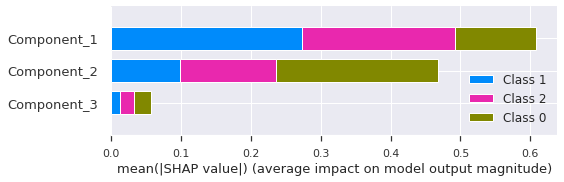

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
